# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
from scipy import stats
import requests
from requests import get
from pprint import pprint
import json
import time
import os  

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
units = "metric"

base_url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

print(json.dumps(query_url, indent=4, sort_keys=True))

#########______________CODE_GRAVEYARD_____________###########

#set up URL etc

# url = f"http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={weather_api_key}"
# response = requests.get(url).json()

#pprint(response)

#print(json.dumps(response, indent=4, sort_keys=True))

"http://api.openweathermap.org/data/2.5/weather?appid=4ef00b731d690eeef8ff4f154d3a5549&units=metric&q="


## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#print(tuple(lat_lngs))
# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
#len(cities)
#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#define units of measurement and base URL
units = "metric"
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#set up empty lists to append relevant data to, and to later add to a dataframe
names, temp, humidity, cloudiness, wind_speed, latitude, longitude = [], [], [], [], [], [], []

#write a for loop that loops through previously defined "cities" list, making a call to the api and throwing data
    #into relevant lists for associated with city name (
for city_title in cities:
    
    try:
        query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city_title}&appid={weather_api_key}&units={units}"
        response = requests.get(query_url).json()
        
        #pprint(response) #< use if need to check to make sure call is working
        
        names.append(response["name"])
        temp.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
    
    except:
        print("City not found; skipping record")


#longitude     

#########______________CODE_GRAVEYARD_____________###########   

#print(query_url)

###Createing a function, I'll try this later

# def get_city_weather:
#return DataFrame

##trying to set up a way to break my loop if needed, pulled from stack overflow

 # while True:
       #timeout = time.time() + 60*1   # 1 minutes from now
 #            test = 0
 #            if test == 5 or time.time() > timeout:
 #                break
    # } test = test - 1
    
##creating a counter, for print statement (that i was only temporarily using)
    #number = 1
    #number += 1 << within the for loop

City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not found; skipping record
City not

In [33]:
#test to see if lists populated correctly via loop
#len(names)

pprint(response) #< use if need to check to make sure call is working

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 44.5011, 'lon': 38.1353},
 'dt': 1665796546,
 'id': 566157,
 'main': {'feels_like': 7.17,
          'grnd_level': 1017,
          'humidity': 73,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 9.86,
          'temp_max': 9.86,
          'temp_min': 9.86},
 'name': 'Divnomorskoye',
 'sys': {'country': 'RU', 'sunrise': 1665805318, 'sunset': 1665845057},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 37, 'gust': 10.33, 'speed': 5.67}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
#create the weather dataframe including all cities and related data

weather_df = pd.DataFrame(list(zip(names, humidity, cloudiness, wind_speed, latitude, longitude, temp)),
               columns =["City Name", "Humidity", "Cloudiness", "Wind Speed", "Latitude", "Longitude", "Max Temperature (C)"])

#print weather dataframe
weather_df

,City Name,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Max Temperature (C)
0,Bengkulu,85,99,0.92,-3.8004,102.2655,25.07
1,Castro,98,100,4.42,-24.7911,-50.0119,13.64
2,Dikson,96,100,9.49,73.5069,80.5464,0.79
3,Ambilobe,79,2,2.30,-13.2000,49.0500,19.24
4,Qaanaaq,89,100,3.06,77.4840,-69.3632,-10.37
...,...,...,...,...,...,...,...
571,Vallenar,61,0,1.40,-28.5708,-70.7581,16.49
572,Caravelas,82,9,2.77,-17.7125,-39.2481,23.15
573,Nyūzen,78,98,2.37,36.9333,137.5000,23.59
574,Orcopampa,26,89,1.25,-15.2661,-72.3417,8.87


In [58]:
#convert temp series to int
weather_df["Max Temperature (C)"] = weather_df["Max Temperature (C)"].astype(int)

#convert Max Temp from Celcius to F and add to new column. Create a new variable first, then make it a series with the conversion
fahrenheit = (weather_df["Max Temperature (C)"]*9/5)+32

#append new series to DF

weather_df["Max Temperature (F)"] = fahrenheit
weather_df

,City Name,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Max Temperature (C),Max Temperature (F)
0,Bengkulu,85,99,0.92,-3.8004,102.2655,25,77.0
1,Castro,98,100,4.42,-24.7911,-50.0119,13,55.4
2,Dikson,96,100,9.49,73.5069,80.5464,0,32.0
3,Ambilobe,79,2,2.30,-13.2000,49.0500,19,66.2
4,Qaanaaq,89,100,3.06,77.4840,-69.3632,-10,14.0
...,...,...,...,...,...,...,...,...
571,Vallenar,61,0,1.40,-28.5708,-70.7581,16,60.8
572,Caravelas,82,9,2.77,-17.7125,-39.2481,23,73.4
573,Nyūzen,78,98,2.37,36.9333,137.5000,23,73.4
574,Orcopampa,26,89,1.25,-15.2661,-72.3417,8,46.4


In [65]:
#write to csv file

weather_df.to_csv("weather_df.csv") 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [66]:
#convert humidity series to int
weather_df["Humidity"] = weather_df["Humidity"].astype(int)

#  Get the indices of cities that have humidity over 100%.
#weather_df.index[weather_df["Humidity"] > 100].tolist()

#confirm that there are no cities where humidity rose above 100%
weather_df.sort_values(by = "Humidity", ascending = False)

,City Name,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Max Temperature (C),Max Temperature (F)
41,Ketchikan,100,100,4.12,55.3422,-131.6461,13,55.4
300,Thompson,100,100,4.63,55.7435,-97.8558,1,33.8
463,Örnsköldsvik,100,100,1.54,63.2909,18.7153,6,42.8
247,Tynda,99,100,5.42,55.1667,124.7167,1,33.8
70,Talnakh,99,100,3.67,69.4865,88.3972,0,32.0
...,...,...,...,...,...,...,...,...
421,Araouane,13,13,3.25,18.9048,-3.5265,31,87.8
93,Saint George,11,0,2.06,37.1041,-113.5841,29,84.2
304,Taoudenni,10,1,3.29,22.6783,-3.9836,31,87.8
554,Winnemucca,10,0,1.54,40.9730,-117.7357,24,75.2


In [67]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#NOT NECESSARY TO PERFORM - NO CITIES CONTAIN OUTLIERS

weather_df.columns

Index(['City Name', 'Humidity', 'Cloudiness', 'Wind Speed', 'Latitude',
       'Longitude', 'Max Temperature (C)', 'Max Temperature (F)'],
      dtype='object')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:title={'center':'Temperature by Latitude effective 10.14.22'}, xlabel='Latitude', ylabel='Max Temperature (F)'>

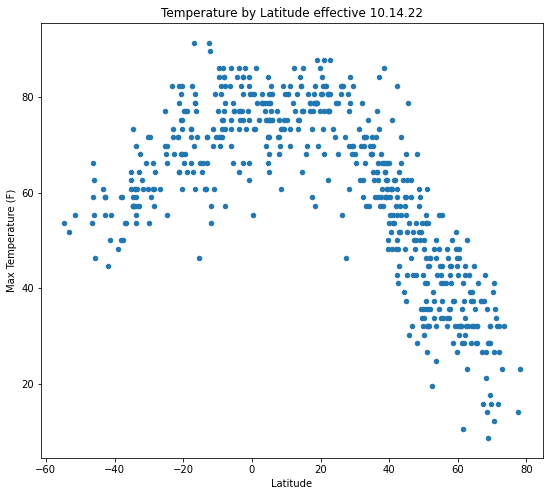

In [68]:
#make the plot
weather_df.plot(x="Latitude", y="Max Temperature (F)", kind="scatter", title="Temperature by Latitude effective 10.14.22", figsize=(9, 8))


#weather_df.plot(kind= "bar")

## Latitude vs. Humidity Plot

<AxesSubplot:title={'center':'Humidity by Latitude effective 10.14.22'}, xlabel='Latitude', ylabel='Humidity'>

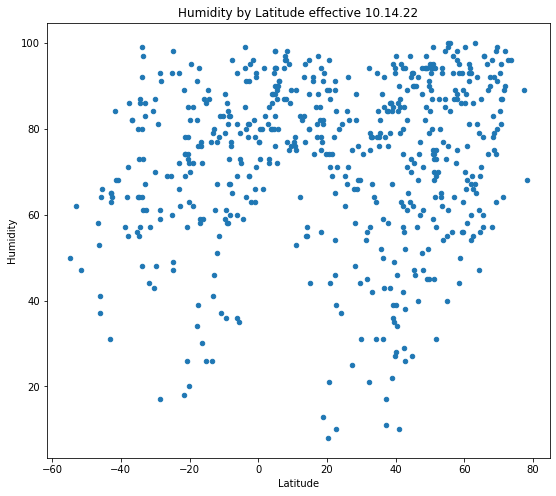

In [18]:
#make the plot
weather_df.plot(x="Latitude", y="Humidity", kind="scatter", title="Humidity by Latitude effective 10.14.22", figsize=(9, 8))


## Latitude vs. Cloudiness Plot

<AxesSubplot:title={'center':'Cloudiness by Latitude effective 10.14.22'}, xlabel='Latitude', ylabel='Cloudiness'>

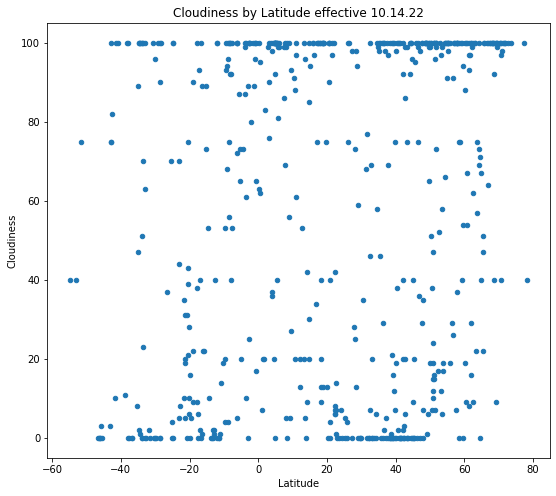

In [19]:
#make the plot
weather_df.plot(x="Latitude", y="Cloudiness", kind="scatter", title="Cloudiness by Latitude effective 10.14.22", figsize=(9, 8))


## Latitude vs. Wind Speed Plot

<AxesSubplot:title={'center':'Wind Speed by Latitude effective 10.14.22'}, xlabel='Latitude', ylabel='Wind Speed'>

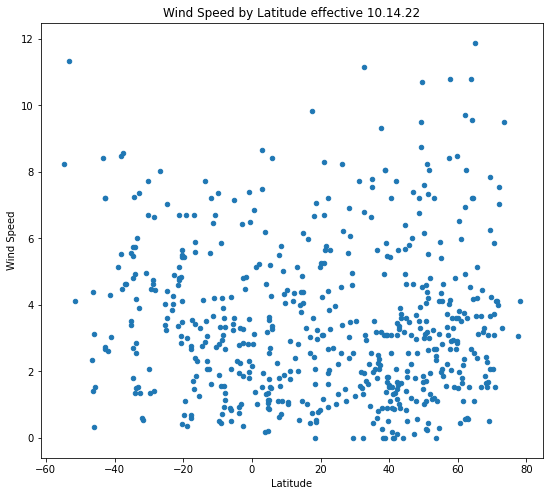

In [20]:
#make the plot
weather_df.plot(x="Latitude", y="Wind Speed", kind="scatter", title="Wind Speed by Latitude effective 10.14.22", figsize=(9, 8))


## Linear Regression

In [72]:
#see what lats are present
weather_df.sort_values(by = "Latitude", ascending = True)

#see if any lie on 0 or the equator - none do
# equator_df = weather_df[weather_df["Latitude"] == -1]
# equator_df

#define northern and southern hemisphere for dataframe
northern_hemisphere_df = weather_df[weather_df["Latitude"] >= 0]
southern_hemisphere_df = weather_df[weather_df["Latitude"] < 0]

#see characteristics of both dfs
#northern_hemisphere_df.sort_values(by = "Latitude", ascending = True)
#southern_hemisphere_df.sort_values(by = "Latitude", ascending = False)
northern_hemisphere_df.columns

Index(['City Name', 'Humidity', 'Cloudiness', 'Wind Speed', 'Latitude',
       'Longitude', 'Max Temperature (C)', 'Max Temperature (F)'],
      dtype='object')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

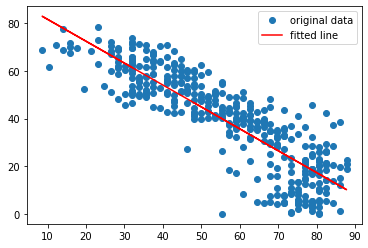

In [73]:
#perform regression on specified DF and specific variables
northern_temp_v_lat_regression = stats.linregress(northern_hemisphere_df["Max Temperature (F)"], northern_hemisphere_df["Latitude"])
northern_temp_v_lat_regression

#plot the regression
plt.plot(northern_hemisphere_df["Max Temperature (F)"], northern_hemisphere_df["Latitude"], 'o', label='original data')
plt.plot(northern_hemisphere_df["Max Temperature (F)"], northern_temp_v_lat_regression.intercept + northern_temp_v_lat_regression.slope*northern_hemisphere_df["Max Temperature (F)"], 'r', label='fitted line')
plt.legend()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

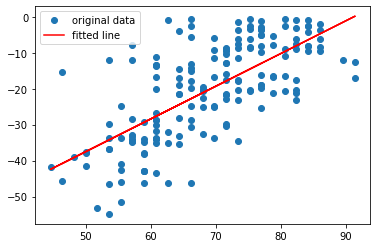

In [74]:
#perform regression on specified DF and specific variables
southern_temp_v_lat_regression = stats.linregress(southern_hemisphere_df["Max Temperature (F)"], southern_hemisphere_df["Latitude"])
southern_temp_v_lat_regression

#plot the regression
plt.plot(southern_hemisphere_df["Max Temperature (F)"], southern_hemisphere_df["Latitude"], 'o', label='original data')
plt.plot(southern_hemisphere_df["Max Temperature (F)"], southern_temp_v_lat_regression.intercept + southern_temp_v_lat_regression.slope*southern_hemisphere_df["Max Temperature (F)"], 'r', label='fitted line')
plt.legend()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

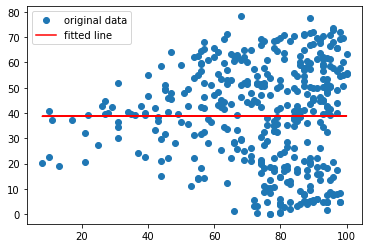

In [24]:
#perform regression on specified DF and specific variables
northern_humidity_v_lat_regression = stats.linregress(northern_hemisphere_df["Humidity"], northern_hemisphere_df["Latitude"])
northern_humidity_v_lat_regression

#plot the regression
plt.plot(northern_hemisphere_df["Humidity"], northern_hemisphere_df["Latitude"], 'o', label='original data')
plt.plot(northern_hemisphere_df["Humidity"], northern_humidity_v_lat_regression.intercept + northern_humidity_v_lat_regression.slope*northern_hemisphere_df["Humidity"], 'r', label='fitted line')
plt.legend()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

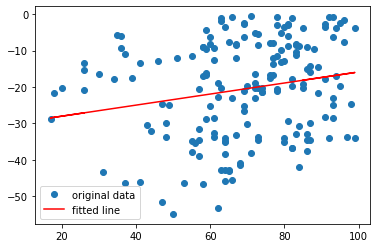

In [25]:
#perform regression on specified DF and specific variables
southern_humidity_v_lat_regression = stats.linregress(southern_hemisphere_df["Humidity"], southern_hemisphere_df["Latitude"])
southern_humidity_v_lat_regression

#plot the regression
plt.plot(southern_hemisphere_df["Humidity"], southern_hemisphere_df["Latitude"], 'o', label='original data')
plt.plot(southern_hemisphere_df["Humidity"], southern_humidity_v_lat_regression.intercept + southern_humidity_v_lat_regression.slope*southern_hemisphere_df["Humidity"], 'r', label='fitted line')
plt.legend()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

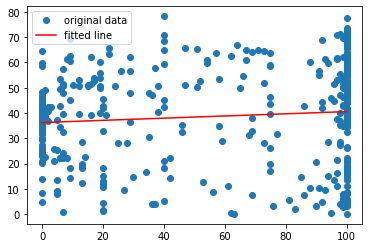

In [26]:
#perform regression on specified DF and specific variables
northern_cloudiness_v_lat_regression = stats.linregress(northern_hemisphere_df["Cloudiness"], northern_hemisphere_df["Latitude"])
northern_cloudiness_v_lat_regression

#plot the regression
plt.plot(northern_hemisphere_df["Cloudiness"], northern_hemisphere_df["Latitude"], 'o', label='original data')
plt.plot(northern_hemisphere_df["Cloudiness"], northern_cloudiness_v_lat_regression.intercept + northern_cloudiness_v_lat_regression.slope*northern_hemisphere_df["Cloudiness"], 'r', label='fitted line')
plt.legend()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

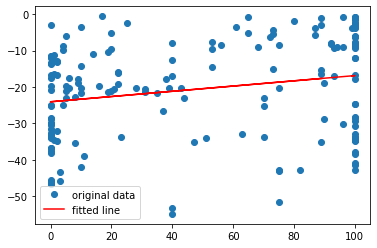

In [27]:
#perform regression on specified DF and specific variables
southern_cloudiness_v_lat_regression = stats.linregress(southern_hemisphere_df["Cloudiness"], southern_hemisphere_df["Latitude"])
southern_cloudiness_v_lat_regression

#plot the regression
plt.plot(southern_hemisphere_df["Cloudiness"], southern_hemisphere_df["Latitude"], 'o', label='original data')
plt.plot(southern_hemisphere_df["Cloudiness"], southern_cloudiness_v_lat_regression.intercept + southern_cloudiness_v_lat_regression.slope*southern_hemisphere_df["Cloudiness"], 'r', label='fitted line')
plt.legend()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

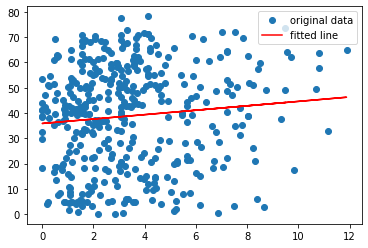

In [28]:
#perform regression on specified DF and specific variables
northern_wind_v_lat_regression = stats.linregress(northern_hemisphere_df["Wind Speed"], northern_hemisphere_df["Latitude"])
northern_wind_v_lat_regression

#plot the regression
plt.plot(northern_hemisphere_df["Wind Speed"], northern_hemisphere_df["Latitude"], 'o', label='original data')
plt.plot(northern_hemisphere_df["Wind Speed"], northern_wind_v_lat_regression.intercept + northern_wind_v_lat_regression.slope*northern_hemisphere_df["Wind Speed"], 'r', label='fitted line')
plt.legend()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

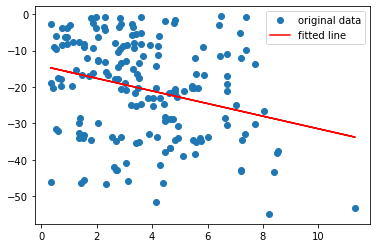

In [31]:
#perform regression on specified DF and specific variables
southern_wind_v_lat_regression = stats.linregress(southern_hemisphere_df["Wind Speed"], southern_hemisphere_df["Latitude"])
southern_wind_v_lat_regression

#plot the regression
plt.plot(southern_hemisphere_df["Wind Speed"], southern_hemisphere_df["Latitude"], 'o', label='original data')
plt.plot(southern_hemisphere_df["Wind Speed"], southern_wind_v_lat_regression.intercept + southern_wind_v_lat_regression.slope*southern_hemisphere_df["Wind Speed"], 'r', label='fitted line')
plt.legend()
plt.show()